In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike_sales0 = pd.read_excel(r'C:\Users\sasha\Documents\Data Analysis\Excel+CSV\bike_sales_data_raw.xlsx')

In [2]:
# Copying a table
bike_sales = bike_sales0.copy()

In [3]:
# Changing Null Values
null_day = bike_sales[bike_sales.Day.isna()]
null_day
bike_sales.loc[10, 'Day'] = 5

null_quantity = bike_sales[bike_sales.Order_Quantity.isna()]
null_quantity
bike_sales[bike_sales.Product_Description == 'Mountain-500 Black, 42']
bike_sales.loc[22, 'Order_Quantity'] = 1

null_agroup = bike_sales[bike_sales['Age_Group'].isna()]
null_agroup
bike_sales.loc[22, 'Age_Group'] = 'Adults (35-64)'

In [3]:
# Correcting typos
bike_sales.loc[1, 'Sales_Order #'] = 261696
bike_sales.Country = bike_sales.Country.replace('.*United.*States.*', 'United States', regex = True)

In [5]:
# Columns fixing, an extra whitespace is there
bike_sales.columns = bike_sales.columns.str.strip()

In [6]:
# Changing Data types, making Data more readable
bike_sales['Day'] = bike_sales['Day'].astype(int)
bike_sales['Order_Quantity'] = bike_sales['Order_Quantity'].astype(int)
bike_sales['Unit_Cost'] = bike_sales['Unit_Cost'].astype(int)
bike_sales['Unit_Price'] = bike_sales['Unit_Price'].astype(int)
bike_sales['Profit'] = bike_sales['Profit'].astype(int)
bike_sales['Cost'] = bike_sales['Cost'].astype(int)
bike_sales['Revenue'] = bike_sales['Revenue'].astype(int)
bike_sales.Customer_Gender = bike_sales.Customer_Gender.replace('M', 'Male')
bike_sales.Customer_Gender = bike_sales.Customer_Gender.replace('F', 'Female')

In [7]:
# Inserting correct Data
bike_unit_cost = bike_sales[bike_sales['Unit_Cost'] == 0]
bike_unit_cost

bike_sales.loc[4, 'Unit_Cost'] = 1252
bike_sales.loc[4, 'Cost'] = 2504

desc2 = bike_sales[bike_sales.Product_Description == 'Mountain-400-W Silver, 42']
desc2

bike_sales.loc[8, 'Unit_Price'] = 769
bike_sales.loc[8, 'Revenue'] = 3076

desc3 = bike_sales[bike_sales.Product_Description == 'Mountain-500 Black, 42']
desc3

bike_sales.loc[22, 'Cost'] = 295
bike_sales.loc[22, 'Revenue'] = 540

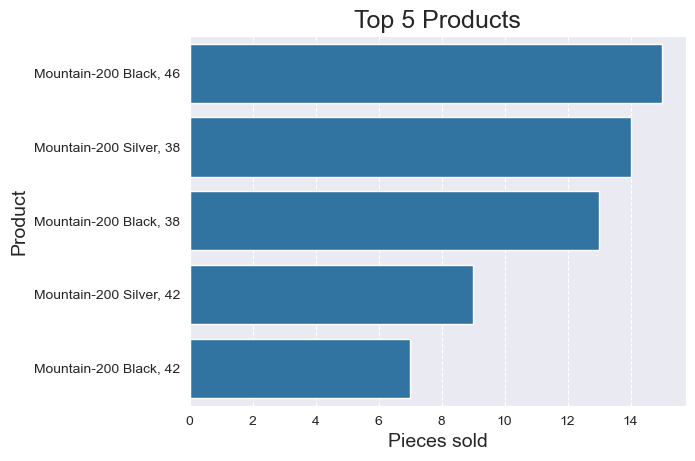

In [30]:
# Creating a bar chart tht shows top 5 selling products
top_5_prod = bike_sales.Product_Description.value_counts().head()
data = top_5_prod.reset_index()
data.columns = ["Product", "Pieces_Sold"]

sns.barplot(x = "Pieces_Sold", y = "Product", data=data, order=data["Product"])
plt.title("Top 5 Products", size = 18)
plt.grid(True, which = 'major', axis = 'x', linestyle='--')
plt.xlabel("Pieces sold", size = 14)
plt.ylabel("Product", size = 14)
plt.show()

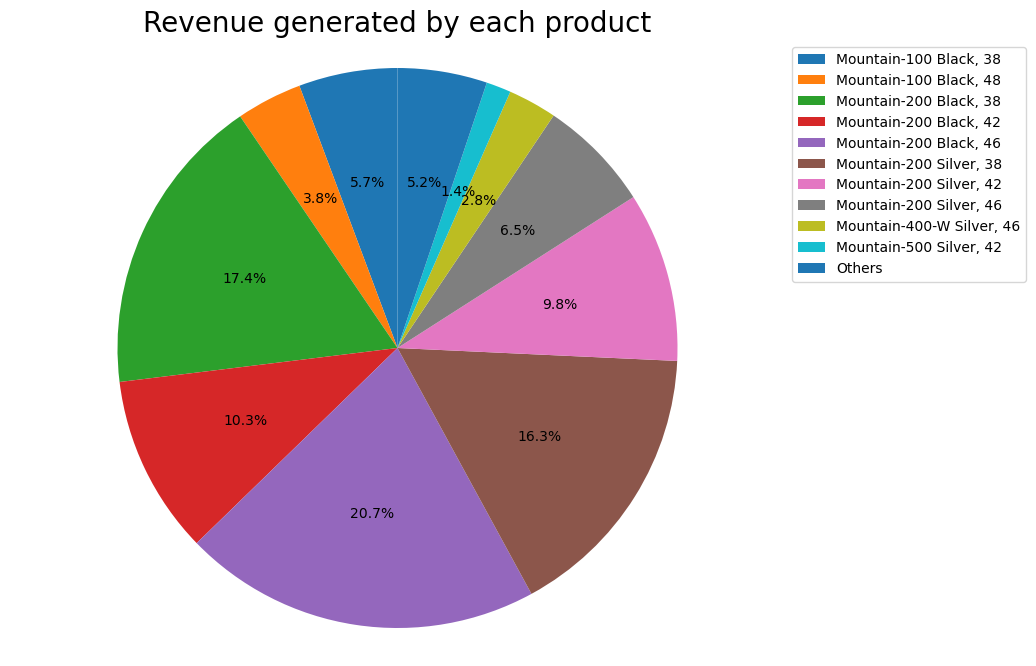

In [19]:
# Grouping Revenue by Product
revenue_by_prod = bike_sales.groupby('Product_Description')['Revenue'].agg('sum')

#Applying a Revenue limit
limit = 5000
# All the product with a total Revenue generated < 5000 will be grouped together
grouped_revenue = revenue_by_prod[revenue_by_prod >= limit].copy()
grouped_revenue['Others'] = revenue_by_prod[revenue_by_prod < limit].sum()

labels = grouped_revenue.index
values = grouped_revenue.values

plt.figure(figsize=(10, 8))
plt.pie(values, labels = None, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Revenue generated by each product", size = 20)
plt.show()

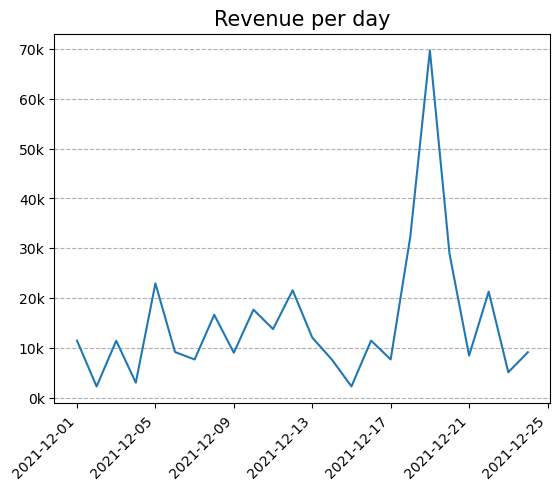

In [10]:
# Grouping Revenue by Date
revenue_by_day = bike_sales.groupby('Date')['Revenue'].agg('sum')

# Formatting thousands on a y-axis
def thousands_format(x, pos):
    return f'{int(x/1000)}k'

# Creating a chart that shows generated Revenue Daily
plt.plot(revenue_by_day)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(thousands_format))
plt.title("Revenue per day", size = 15)
plt.grid(True, which = 'major', axis = 'y', linestyle='--')
plt.xticks(rotation = 45, ha = "right")
plt.show()

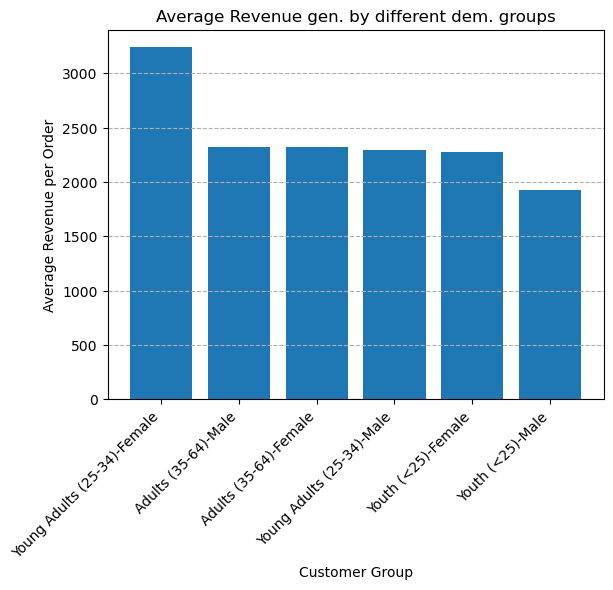

In [11]:
# Grouping data by different columns
groups = bike_sales[['Age_Group', 'Customer_Gender']].value_counts()
# Calculating average Revenue by different demographic groups
avg_revenue_age_sex = bike_sales.groupby(['Age_Group', 'Customer_Gender']).Revenue.median().sort_values()

avg_revenue_age_sex = avg_revenue_age_sex.reset_index()

# Assigning labels
x_label = avg_revenue_age_sex['Age_Group'] + "-" + avg_revenue_age_sex['Customer_Gender']
y_label = avg_revenue_age_sex.Revenue

plt.bar(x_label, y_label)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True, which = 'major', axis = 'y', linestyle='--')
plt.ylabel("Average Revenue per Order")
plt.xlabel("Customer Group")
plt.title("Average Revenue gen. by different dem. groups")
plt.gca().invert_xaxis()
plt.show()

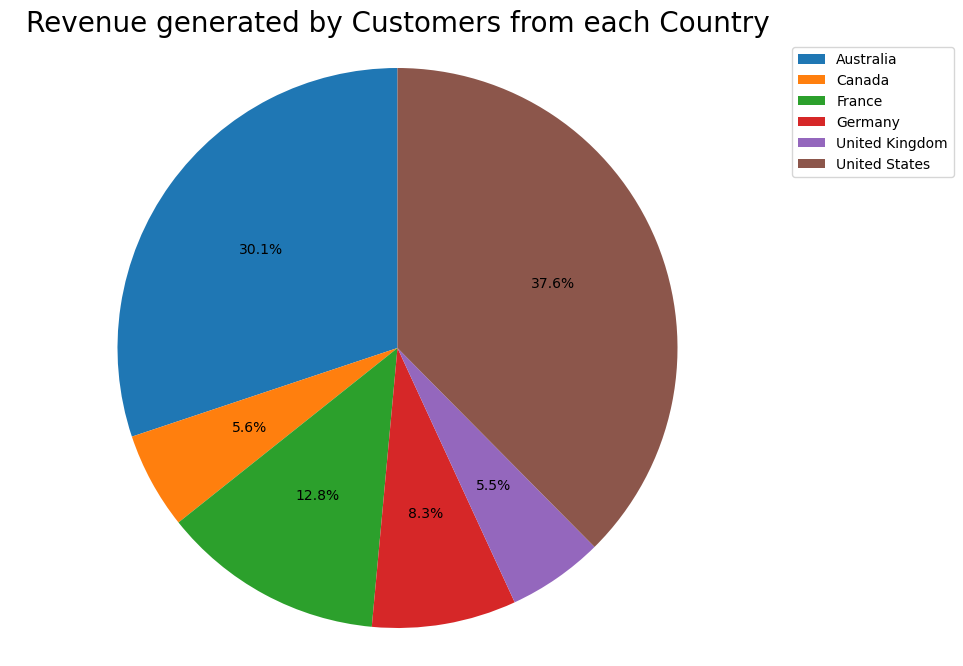

In [22]:
# Grouping Revenue by Country
revenue_by_country = bike_sales.groupby('Country')['Revenue'].agg('sum')

# Assigning labels and values
labels = revenue_by_country.index
values = revenue_by_country.values

plt.figure(figsize=(10, 8))
plt.pie(values, labels=None, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Revenue generated by Customers from each Country", size = 20)
plt.legend(labels, loc = 'upper left', bbox_to_anchor= (1,1))
plt.show()


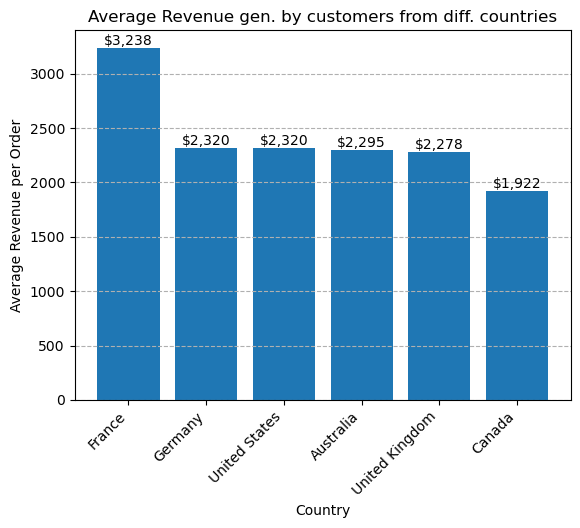

In [13]:
bike_sales['Revenue'] = pd.to_numeric(bike_sales['Revenue'], errors='coerce')

# Grouping data by Country
orders_country_count = bike_sales['Country'].value_counts()
# Calculating average Revenue by different demographic groups
avg_revenue_country = bike_sales.groupby('Country').Revenue.median().sort_values()

avg_revenue_country = avg_revenue_country.reset_index()

# Assigning labels
x_label = avg_revenue_country['Country'] 
y_label = avg_revenue_age_sex['Revenue']

plt.bar(x_label, y_label)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True, which = 'major', axis = 'y', linestyle='--')
plt.ylabel("Average Revenue per Order")
plt.xlabel("Country")
plt.title("Average Revenue gen. by customers from diff. countries")
for i, v in enumerate(y_label):
    plt.text(i, v + 1.02, f'${v:,.0f}', ha='center', va='bottom')
plt.gca().invert_xaxis()
plt.show()